# Проект: Линейные модели в машинном обучении

## Описание проекта
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
* id — уникальный идентификатор коровы.
* Удой, кг — масса молока, которую корова даёт в год (в килограммах).
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
* Сырой протеин, г — содержание сырого протеина в корме (в граммах).
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Жирность,% — содержание жиров в молоке (в процентах).
* Белок,% — содержание белков в молоке (в процентах).
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.
* Характеристики коровы: id, Порода, порода папы_быка, Возраст.
* Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
* Характеристика пастбища: Тип пастбища.
* Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

## Загрузка данных

In [1]:
!pip install -U scikit-learn 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (r2_score, 
                             mean_squared_error, 
                             mean_absolute_error, 
                             accuracy_score, 
                             precision_score,
                             recall_score, 
                             confusion_matrix,
                             precision_recall_curve, 
                             auc)

In [3]:
warnings.filterwarnings('ignore') # скроем лишние предупреждения

In [4]:
try:
    df_ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
    df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
    df_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
except:
    df_ferma = pd.read_csv('ferma_main.csv', sep=';', decimal=',')
    df_dad = pd.read_csv('ferma_dad.csv', sep=';', decimal=',')
    df_buy = pd.read_csv('cow_buy.csv', sep=';', decimal=',')

In [5]:
display(df_ferma.head())
display(df_dad.head())
display(df_buy.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [6]:
#функция для описания датасета
def df_describe(df):
    display(df.head(10))
    print('Общая информацию о полученном датафрейме:')
    df.info()
    print('Описание данных:')
    display(df.describe())
    print('Количество пустых значений:')
    display(df.isna().sum())
    print('Количество явных дубликатов:')
    display(df.duplicated().sum())

In [7]:
df_describe(df_ferma) 

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


Общая информацию о полученном датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                     

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Количество пустых значений:


id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

Количество явных дубликатов:


5

In [8]:
df_describe(df_dad)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


Общая информацию о полученном датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
Описание данных:


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


Количество пустых значений:


id          0
Имя Папы    0
dtype: int64

Количество явных дубликатов:


0

In [9]:
df_describe(df_buy)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Общая информацию о полученном датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
Описание данных:


,"Текущая_жирность,%","Текущий_уровень_белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Количество пустых значений:


Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

Количество явных дубликатов:


4

Переименуем столбцы на английский, используя нижний регистр

In [10]:
df_ferma.columns = ['id', 'milk_yield_kg', 'efu', 'crude_protein_g', 'spr', 'breed', 'pasture_type', 'dads_breed', 'fat_content', 'protein_content', 'taste', 'age']
df_ferma.head()

,id,milk_yield_kg,efu,crude_protein_g,spr,breed,pasture_type,dads_breed,fat_content,protein_content,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [11]:
df_dad.columns = ['id', 'dads_name']
df_dad.head()

,id,dads_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [12]:
df_buy.columns = ['breed', 'pasture_type', 'dads_breed', 'dads_name', 'fat_content', 'protein_content', 'age']
df_buy.head()

,breed,pasture_type,dads_breed,dads_name,fat_content,protein_content,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Вывод:** в датасете ferma_main - 634 значения, пропуски отсутсвуют, количество явных дубликатов - 5. В датасете ferma_dad - 629 значений, пропуски отсутсвуют, явные дубликаты отсутсвуют. В датасете cow_buy - 20 значений, пропуски отсутсвуют, количество явных дубликатов - 4.

##  Предобработка данных

In [13]:
df_ferma = df_ferma.drop_duplicates().reset_index(drop=True) # удаляем дубликаты
df_ferma.duplicated().sum() #проверяем

0

In [14]:
columns_ferma = ['breed', 'pasture_type', 'dads_breed'] # приводим строковые значения в нижний регистр
for column in columns_ferma:
    df_ferma[column] = df_ferma[column].str.lower()

df_ferma.head()

,id,milk_yield_kg,efu,crude_protein_g,spr,breed,pasture_type,dads_breed,fat_content,protein_content,taste,age
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинные,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинные,соверин,3.73,3.073,вкусно,менее_2_лет


In [15]:
np.unique(df_ferma[['breed', 'pasture_type', 'dads_breed']].values) # проверяем уникальные значения в строковых данных

array(['айдиал', 'айдиалл', 'вис бик айдиал', 'равнинное', 'равнинные',
       'рефлешнсоверинг', 'соверин', 'холмистое'], dtype=object)

In [16]:
df_ferma['pasture_type'] = df_ferma['pasture_type'].replace('равнинные', 'равнинное') # меняем значения с ошибками
df_ferma['dads_breed'] = df_ferma['dads_breed'].replace('айдиалл', 'айдиал')
display(df_ferma.head()) # проверяем
np.unique(df_ferma[['breed', 'pasture_type', 'dads_breed']].values)

,id,milk_yield_kg,efu,crude_protein_g,spr,breed,pasture_type,dads_breed,fat_content,protein_content,taste,age
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


array(['айдиал', 'вис бик айдиал', 'равнинное', 'рефлешнсоверинг',
       'соверин', 'холмистое'], dtype=object)

In [17]:
df_dad['dads_name'] = df_dad['dads_name'].str.lower() # приведем значения в столбце к нижнему регистру
df_dad.head()

,id,dads_name
0,1,буйный
1,2,соловчик
2,3,барин
3,4,буйный
4,5,барин


In [18]:
columns_buy = ['breed', 'pasture_type', 'dads_breed', 'dads_name'] # приводим строковые значения в нижний регистр
for column in columns_buy:
    df_buy[column] = df_buy[column].str.lower()

df_buy.head()

,breed,pasture_type,dads_breed,dads_name,fat_content,protein_content,age
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


In [19]:
duplicates_buy = df_buy[df_buy.duplicated(keep=False)] # выводим дубликаты в датасете
duplicates_buy

,breed,pasture_type,dads_breed,dads_name,fat_content,protein_content,age
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
14,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
19,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


In [20]:
df_buy = df_buy.drop_duplicates(keep='first').reset_index(drop=True) # удаляем дубликаты
df_buy.duplicated().sum() # проверяем

0

**Вывод:** в ходе предобработки данных в датасетах строковые значения были приведены в нижний регистр, удалены дубликаты.

## Исследовательский анализ данных

In [21]:
df_ferma.describe() # смотрим описательную статистику

,id,milk_yield_kg,efu,crude_protein_g,spr,fat_content,protein_content
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


В признаке milk_yield_kg явно присутсвуют выбросы.

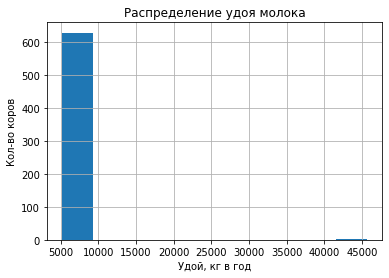

In [22]:
df_ferma['milk_yield_kg'].hist() # визуализируем данные
plt.title('Распределение удоя молока')
plt.xlabel('Удой, кг в год')
plt.ylabel('Кол-во коров')
plt.show()

In [23]:
df_ferma[df_ferma['milk_yield_kg'] > 8000]

,id,milk_yield_kg,efu,crude_protein_g,spr,breed,pasture_type,dads_breed,fat_content,protein_content,taste,age
16,17,45616,11.5,1675,0.93,вис бик айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет


В признаке 'milk_yield_kg' присутсвует 1 аномальное значение. Его необходимо удалить.

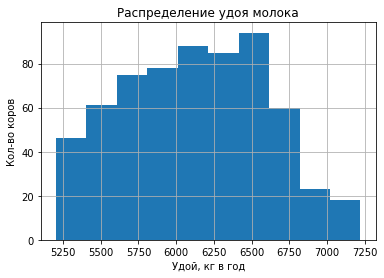

In [24]:
df_ferma.drop(16, inplace=True)# удаляем строку
df_ferma['milk_yield_kg'].hist() # визуализируем данные
plt.title('Распределение удоя молока')
plt.xlabel('Удой, кг в год')
plt.ylabel('Кол-во коров')
plt.show()

In [25]:
# напишем функция для построения гистограмм и диаграмм размаха
def viz_col(df, feature):
    print(f'Описательная статистика для признака {feature}:')
    display(df[feature].describe())
    
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=50)
    plt.title(f'Распределение коров по признаку {feature}', fontsize=15)
    plt.xlabel(f'Признак {feature}', fontsize=14)
    plt.ylabel('Плотность распределения', fontsize=14)
    
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[feature])
    plt.title(f'Диаграмма размаха по признаку {feature}', fontsize=15)
    plt.xlabel(f'Значения признака {feature}', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    

Описательная статистика для признака milk_yield_kg:


count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield_kg, dtype: float64

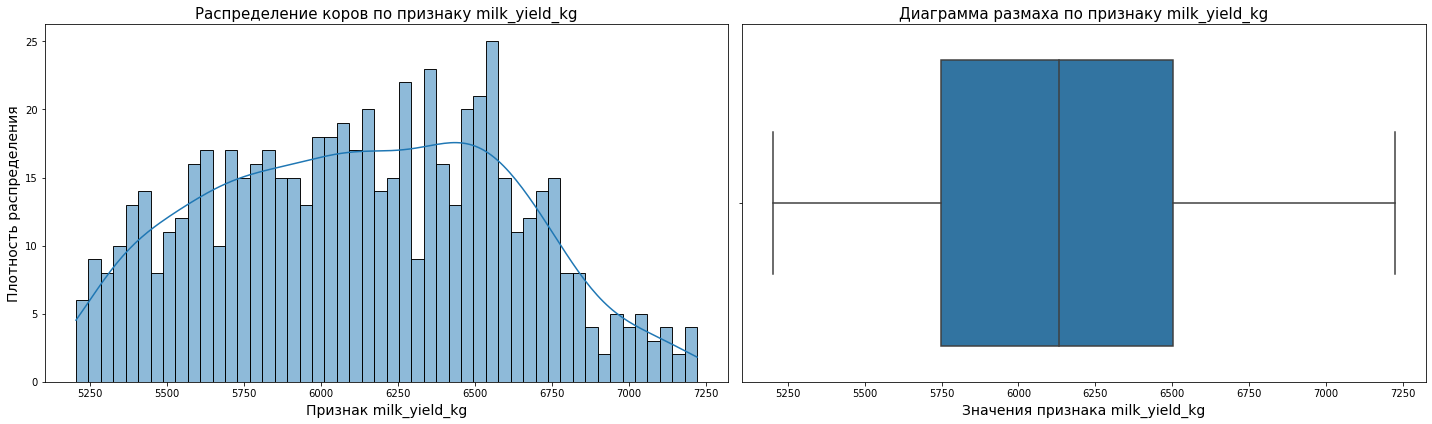

Описательная статистика для признака efu:


count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: efu, dtype: float64

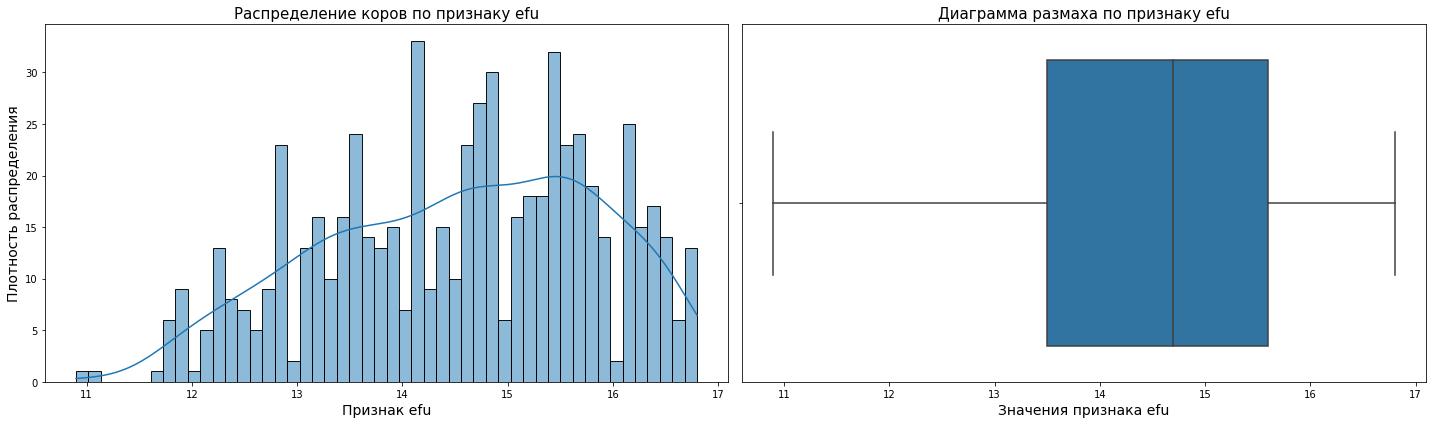

Описательная статистика для признака crude_protein_g:


count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: crude_protein_g, dtype: float64

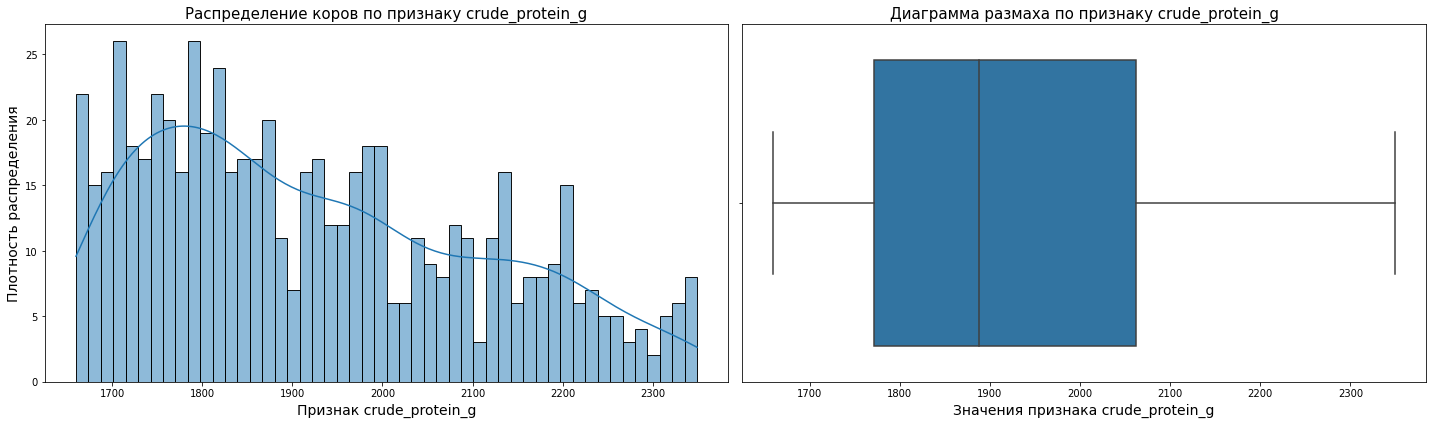

Описательная статистика для признака spr:


count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spr, dtype: float64

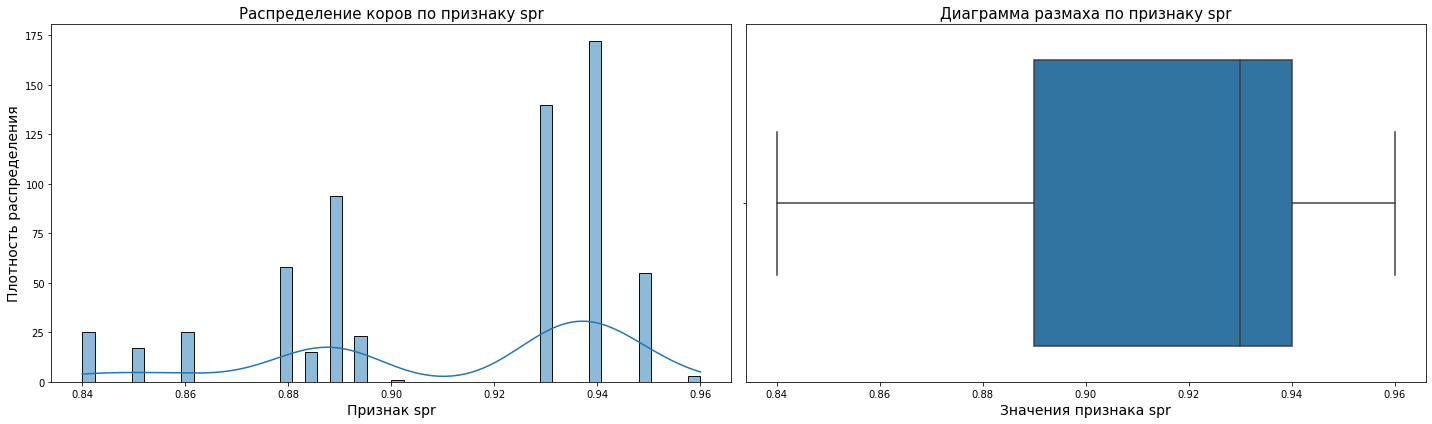

Описательная статистика для признака fat_content:


count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64

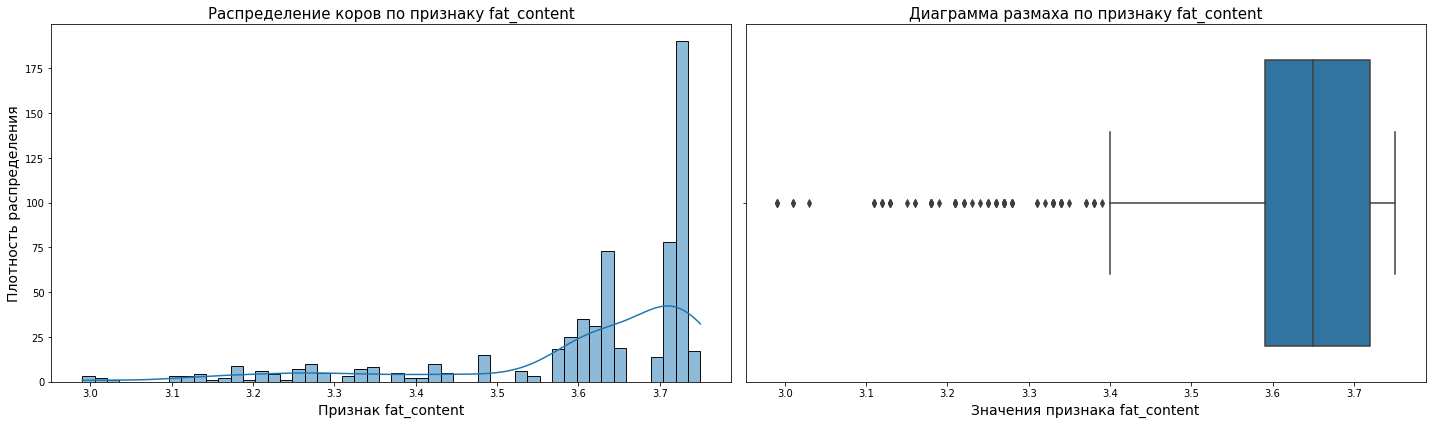

Описательная статистика для признака protein_content:


count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein_content, dtype: float64

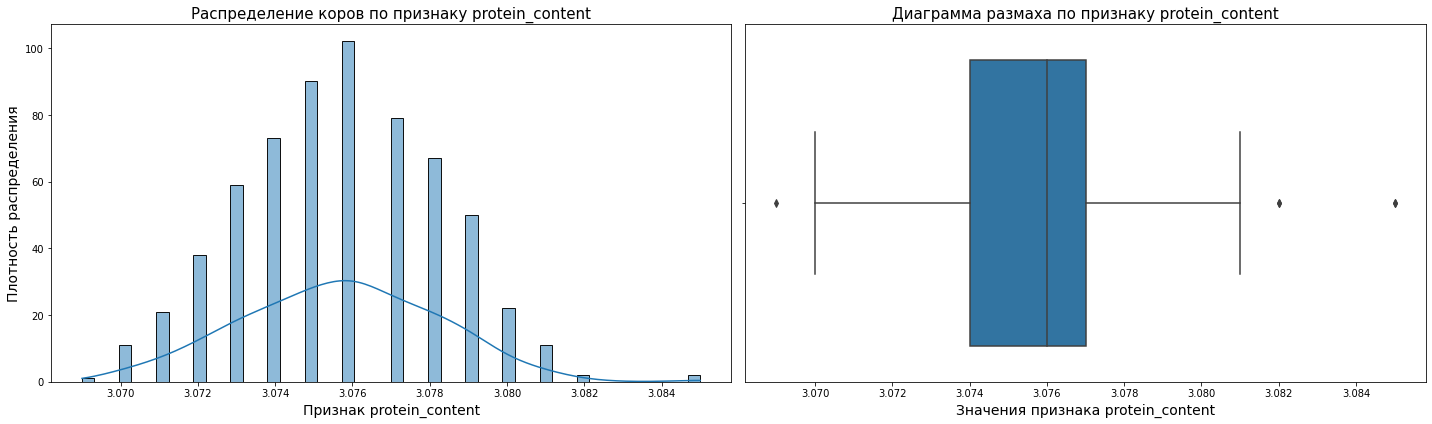

In [26]:
# выделим количественные признаки
columns_ferma = ['milk_yield_kg', 'efu', 'crude_protein_g', 'spr', 'fat_content', 'protein_content']

#применим к ним функцию
for column in columns_ferma:
    viz_col(df_ferma, column)

У всех количественных признаков распределение не является нормальным, за исключением признака содержания белка в молоке.

В признаке protein_content присутсвуют единичные выборосы. Множественные выбросы имеются в признаке fat_content. Взглянем не него более подробно.

In [27]:
display(df_ferma[df_ferma['fat_content'] < 3.4])
print('Количество выбросов:', len(df_ferma[df_ferma['fat_content'] < 3.4]))

,id,milk_yield_kg,efu,crude_protein_g,spr,breed,pasture_type,dads_breed,fat_content,protein_content,taste,age
5,6,5254,12.7,1806,0.885,рефлешнсоверинг,холмистое,соверин,3.13,3.078,вкусно,менее_2_лет
9,10,5339,13.4,1791,0.895,вис бик айдиал,холмистое,соверин,3.13,3.075,вкусно,менее_2_лет
10,11,5591,13.7,1678,0.895,рефлешнсоверинг,холмистое,айдиал,3.13,3.075,вкусно,менее_2_лет
17,18,5777,12.4,1873,0.895,вис бик айдиал,холмистое,айдиал,3.03,3.080,вкусно,более_2_лет
24,25,5372,13.2,1703,0.895,вис бик айдиал,равнинное,айдиал,3.31,3.078,не вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
587,588,5610,14.7,1671,0.880,вис бик айдиал,равнинное,айдиал,3.18,3.079,не вкусно,более_2_лет
589,590,5213,12.1,2016,0.880,рефлешнсоверинг,равнинное,соверин,3.19,3.076,не вкусно,менее_2_лет
591,592,5520,11.9,1785,0.880,вис бик айдиал,равнинное,соверин,3.12,3.073,не вкусно,менее_2_лет
602,603,5594,12.3,1742,0.880,вис бик айдиал,равнинное,айдиал,3.11,3.077,вкусно,менее_2_лет


Количество выбросов: 86


В признаке 'fat_content' имеется 86 выбросов, которые составляют 13,6% датафрейма. В связи с чем принято решение их оставить.

In [28]:
# функция для визуализация категориальных признаков
def viz_cat(df, feature):
    print(f'Количество коров по признаку {feature}:')
    display(df[feature].value_counts())
    
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x = feature, data = df)
    plt.title(f'Распределение коров по признаку {feature}', fontsize=15)
    plt.xlabel(f'Признак {feature}', fontsize=14)
    plt.ylabel('Кол-во коров', fontsize=14)

    
    plt.subplot(1, 2, 2)
    df.groupby(feature)[feature].count().plot(kind='pie', autopct='%.1f%%', subplots=True)
    plt.title(f'Круговая диаграмма по признаку {feature}', fontsize=15)
    plt.ylabel(f'Признак {feature}', fontsize=14)
    
    plt.tight_layout()
    plt.show()

Количество коров по признаку breed:


вис бик айдиал     372
рефлешнсоверинг    256
Name: breed, dtype: int64

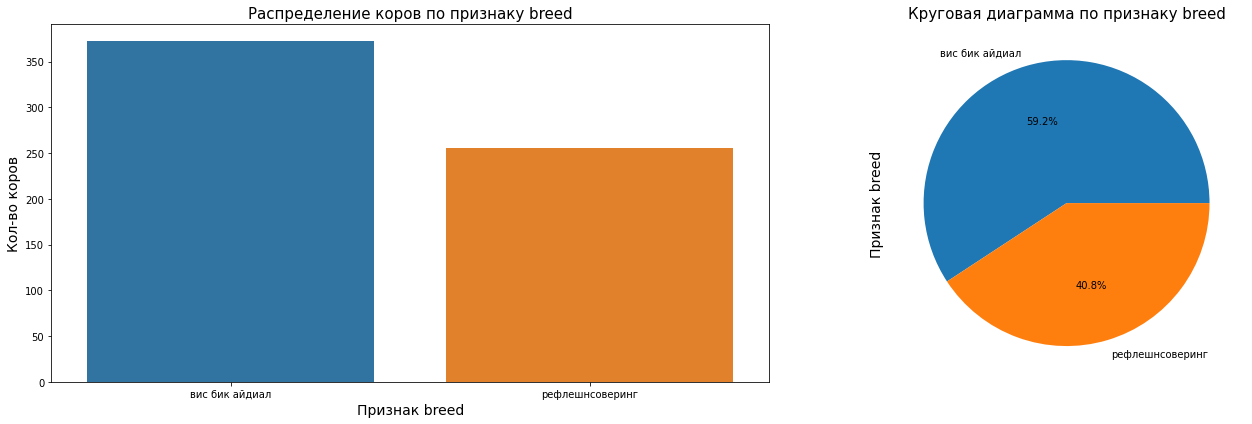

Количество коров по признаку pasture_type:


холмистое    350
равнинное    278
Name: pasture_type, dtype: int64

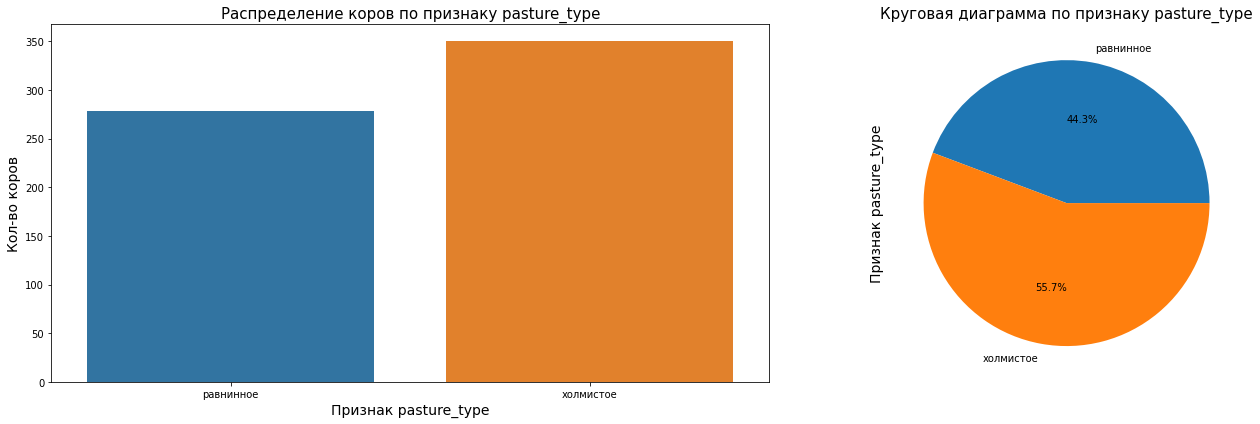

Количество коров по признаку dads_breed:


айдиал     317
соверин    311
Name: dads_breed, dtype: int64

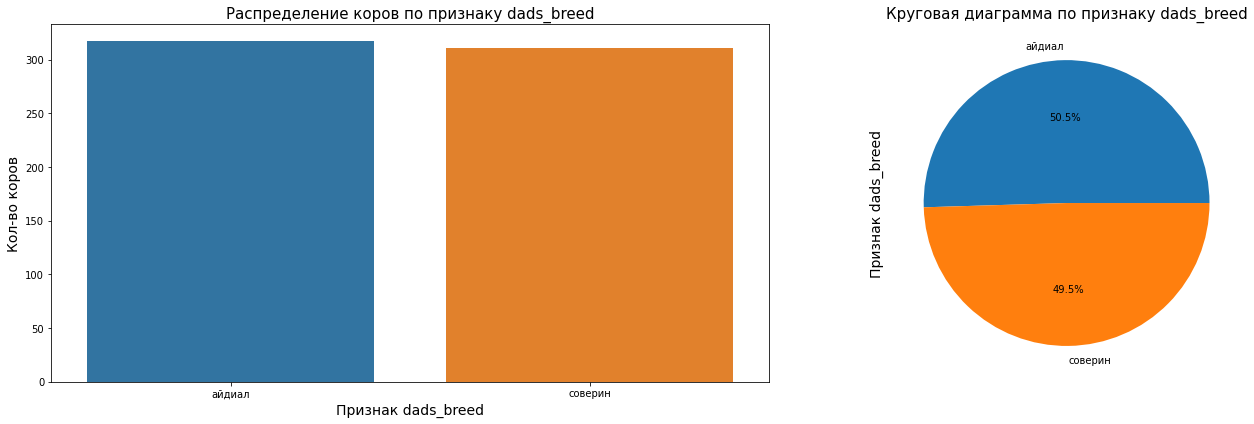

Количество коров по признаку taste:


вкусно       370
не вкусно    258
Name: taste, dtype: int64

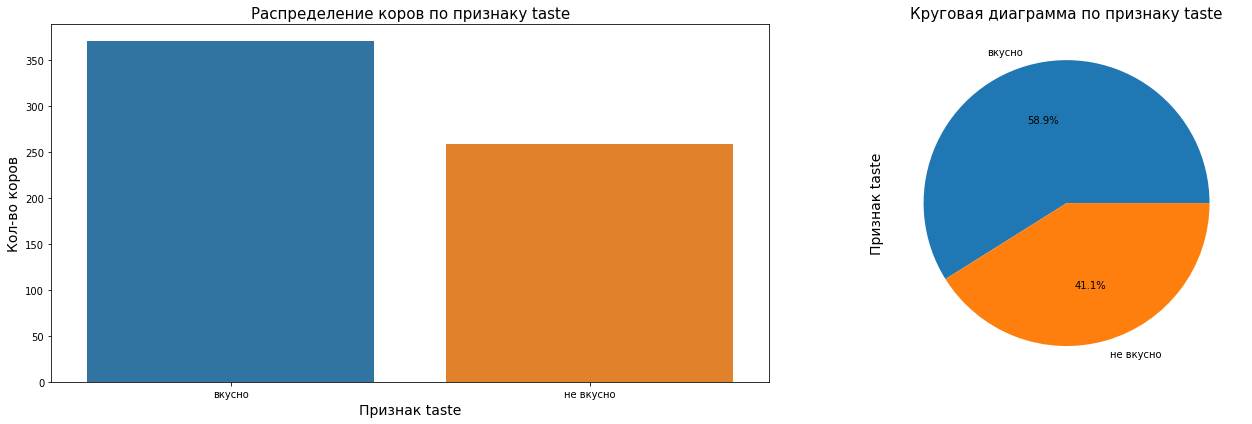

Количество коров по признаку age:


более_2_лет    518
менее_2_лет    110
Name: age, dtype: int64

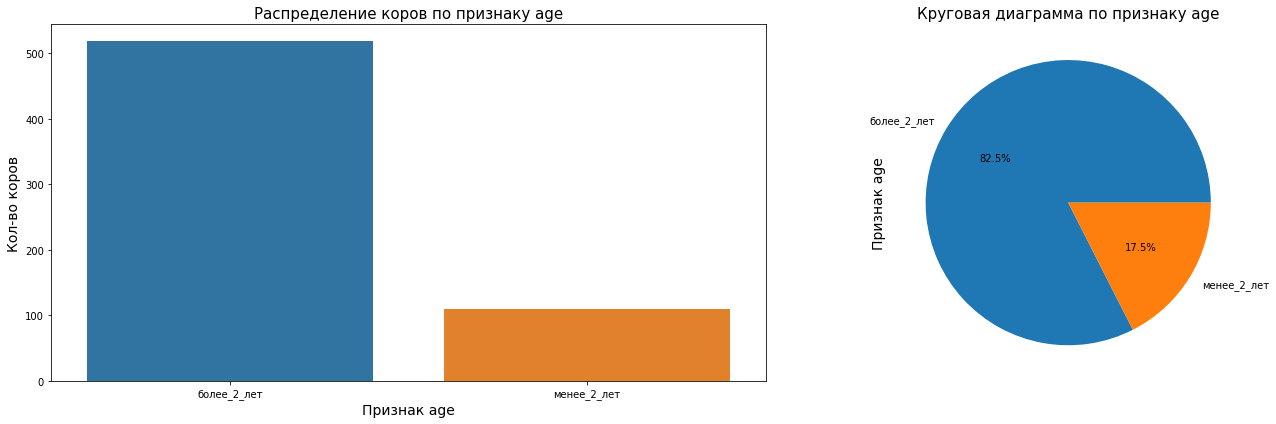

In [29]:
# выделим категориальные признаки
columns_cat = ['breed', 'pasture_type', 'dads_breed', 'taste', 'age']

# применим функцию
for column in columns_cat:
    viz_cat(df_ferma, column)

Количество коров по признаку dads_name:


барин       240
буйный      215
соловчик    110
геркулес     64
Name: dads_name, dtype: int64

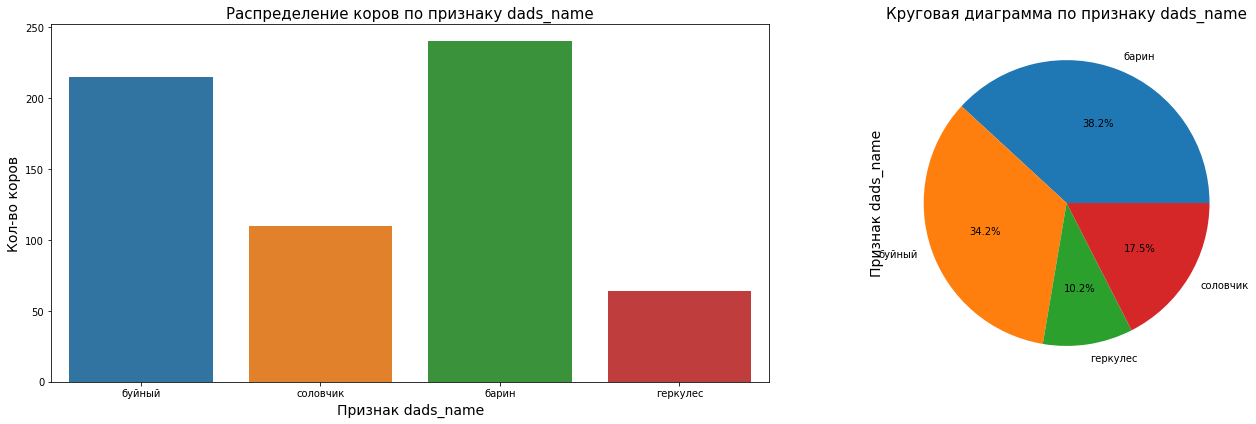

In [30]:
viz_cat(df_dad, 'dads_name')

**Вывод:** 
* В признаке 'milk_yield_kg' аномальное значение, которые было удалено из датасета.
* У всех количественных признаков распределение не является нормальным, за исключением признака содержания белка в молоке. 
* В признаке 'fat_content' имеется 86 выброса, которые составляют 13,6% датафрейма. В связи с чем принято решение их оставить.
* Коров породы 'вис бик айдиал' больше чем коров породы 'рефлешнсоверинг' (372 и 256, соответсвенно).
* Тип пастбища 'холмистое' наблюдается чаще чем тип пастбища 'равнинное' (350 и 278, соответственно.)
* Порода папы-быка 'айдиал' наблюдается несколько чаще чем порода "соверин" (317 и 311, соответсвенно).
* Вкусное молоко наблюдается чаще чем невкусное (370 и 258, соответсвенно).
* Коров старше 2 лет больше чем более молодых коров (519 и 110, соответсвенно).
* Распределение коров в зависимости от папы-быка: Барин - 240 коров, Буйный - 215, Соловчик - 110, Геркулес - 64.

Проведен исследовательский анализ данных. В ходе анализа установлено, что количественные признаки необходимо масштабировать для дальнейшей работы. Категориальные признаки в дальнейшем будут бинарно закодированы.

## Корреляционный анализ

In [31]:
# делаем из столбца id индекс
df_ferma = df_ferma.set_index('id')
df_ferma.head()

,milk_yield_kg,efu,crude_protein_g,spr,breed,pasture_type,dads_breed,fat_content,protein_content,taste,age
id,,,,,,,,,,,
1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


Так как признаки распределены ненормально для оценки корреляции используем коэффициент Спирмена. 

In [32]:
df_ferma.corr(method='spearman') # посмотрим матрицу корреляции

,milk_yield_kg,efu,crude_protein_g,spr,fat_content,protein_content
milk_yield_kg,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
efu,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
crude_protein_g,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
spr,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
fat_content,0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
protein_content,-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


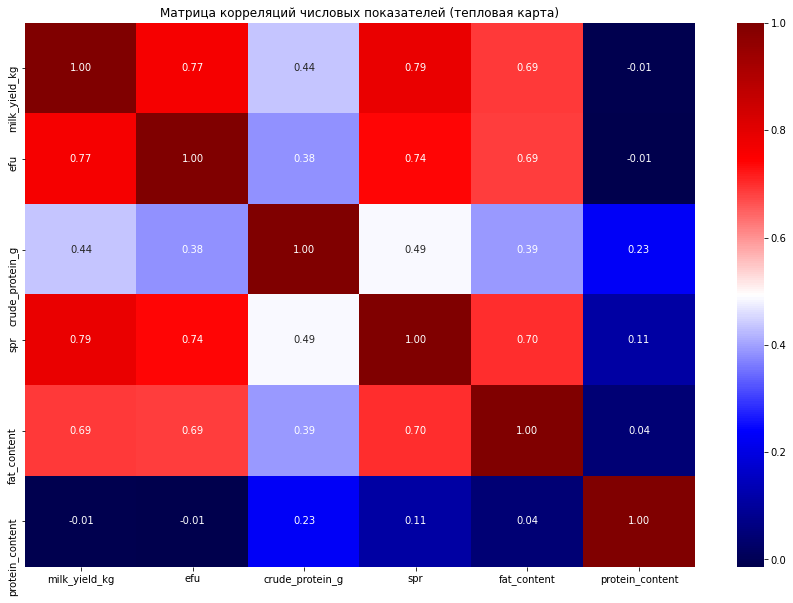

In [33]:
plt.figure(figsize=(15, 10)) # визуализируем данные 
sns.heatmap(df_ferma.corr(method='spearman'), annot=True, cmap='seismic', fmt='.2f') 
plt.title('Матрица корреляций числовых показателей (тепловая карта)')
plt.show()

Коэффициенты корреляций целевого признака 'Удой':
* С признаком 'ЭКЕ" - высокая
* С признаком 'Протеин в граммах' - слабая
* С признаком 'СПО' - высокая
* С признаком 'Жирность' - высокая
* С признаком 'Протеин' - очень слабая

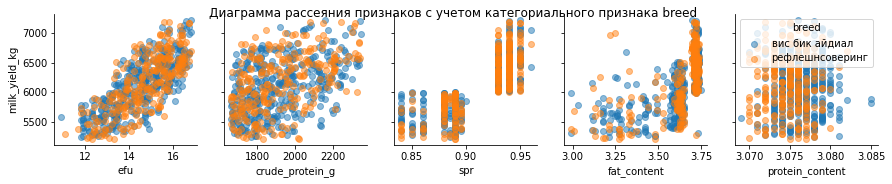

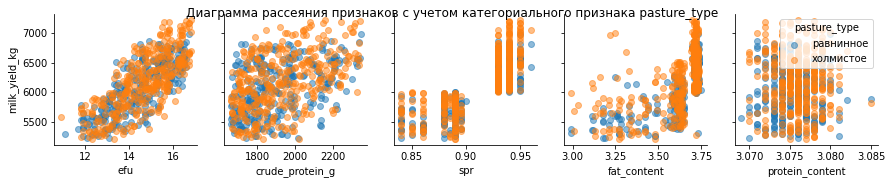

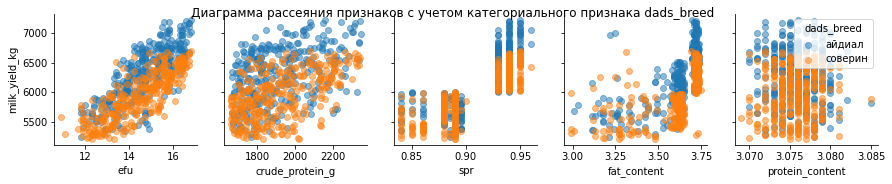

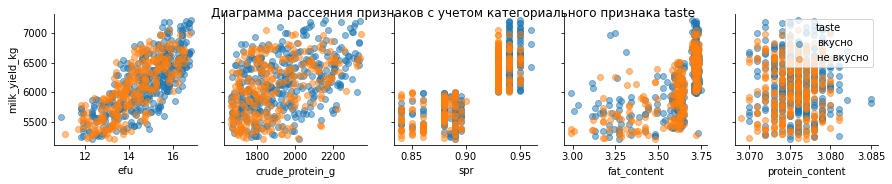

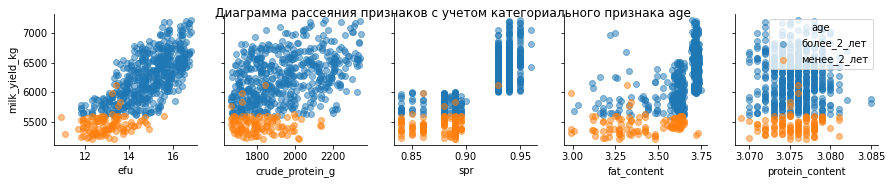

In [34]:
factor = ['efu', 'crude_protein_g', 'spr', 'fat_content', 'protein_content']
cat = ['breed', 'pasture_type', 'dads_breed', 'taste', 'age']
targ = 'milk_yield_kg'

for category in cat:
    g = sns.PairGrid(df_ferma, hue = category, x_vars=factor, y_vars=targ)
    g.map(plt.scatter, alpha=0.5)
    plt.suptitle(f'Диаграмма рассеяния признаков с учетом категориального признака {category}')
    plt.legend(title = category) 
    plt.show()

In [35]:
# оценим мультиколинеарность с помощью VIF
X = df_ferma[['milk_yield_kg', 'efu', 'crude_protein_g', 'spr', 'fat_content', 'protein_content']]

X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

           feature           VIF
0            const  1.576351e+06
1    milk_yield_kg  3.556408e+00
2              efu  2.959531e+00
3  crude_protein_g  1.374328e+00
4              spr  3.504585e+00
5      fat_content  1.883356e+00
6  protein_content  1.088308e+00


**Вывод:** между признаками наблюдается нелинейная связь. Мультиколинеарность между признаками отсутствует.

## Обучение модели линейной регрессии

### Первая модель линейной регрессии

Из обучающий выборки удалим категориальные признаки, связанные с хараектристикой молока ('Содержание жира', 'Содержание белка', 'Вкус'), и не влияющие на целевой признак 'Удой'.

In [36]:
df_ferma.head()

,milk_yield_kg,efu,crude_protein_g,spr,breed,pasture_type,dads_breed,fat_content,protein_content,taste,age
id,,,,,,,,,,,
1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


In [37]:
def linear_regression(X, y, num_col_names, cat_col_names):
    RANDOM_STATE = 42 # создание константы RANDOM_STATE
    X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
    )

    scaler = StandardScaler() # выбор метода масштабирования
    encoder = OneHotEncoder(drop='first', sparse_output=False)

    X_train_scaled = scaler.fit_transform(X_train[num_col_names]) # настройка масштабирования масштабирование на тренировочной выборке
    X_test_scaled = scaler.transform(X_test[num_col_names]) # масштабирование тестовой выбопки

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names) # создаем датафреймы из полученных масшатбированных данных
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) # обучаем и преобразовываем категориальные признаки из тренировочной выборки 
    X_test_ohe = encoder.transform(X_test[cat_col_names]) # преобразовываем тестовую выборку

    encoder_col_names = encoder.get_feature_names_out() # сохраняем названия новых столбцов 

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names) # создаем датафреймы из полученных закодированных данных
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_new = pd.concat([X_train_ohe, X_train_scaled], axis=1) # объединяем датафреймы
    X_test_new = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    model_lr = LinearRegression() # инициализация модели

    model_lr.fit(X_train_new, y_train) # обучение модели на тренировочных данных
    predictions = model_lr.predict(X_test_new) # предсказанные значения 


    r2 = r2_score(y_test, predictions) # считаем метрику R2
    print('Метрика R2 модели линейной регрессии =', r2)
    return model_lr, predictions, X_train_new, X_test_new, y_test, scaler, encoder, r2

In [38]:
X_1 = df_ferma.drop(['fat_content', 'protein_content', 'taste', 'milk_yield_kg'], axis=1) # удаляем категориальные признаи и целевой признак 
y_1 = df_ferma['milk_yield_kg'] # выделяем целевой признак

num_col_names_1 = ['efu', 'crude_protein_g', 'spr'] # выделяем количественные признаки для последующего масштабирования
cat_col_names_1 = ['breed', 'pasture_type', 'dads_breed', 'age'] # выделяем качественные признаки для последующего кодирования

In [39]:
model_lr_1, predictions_1, X_train_1, X_test_1, y_test_1, scaler_1, encoder_1, r2_1 = linear_regression(X_1, 
                                                                                                  y_1, 
                                                                                                  num_col_names_1, 
                                                                                                  cat_col_names_1)

Метрика R2 модели линейной регрессии = 0.7844078173416967


In [40]:
# функция для визуализации распределения остатков
def resid(y, predictions):
    residuals = y - predictions
    
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(residuals, bins=50)
    plt.axvline(0, color='b')
    plt.axvline(residuals.mean(), color='r')
    plt.title('Распределение остатков(residuals)')
    plt.xlabel('Удой')
    plt.ylabel('Остатки')

    plt.subplot(1, 2, 2)
    sns.residplot(x=predictions, y=residuals, lowess = True) 
    plt.title('Диаграмма рассеивания остатков (residuals)')
    plt.xlabel('Прогнозные значения модели')
    plt.ylabel('Остатки (residuals)')
    plt.show()
    
    return residuals

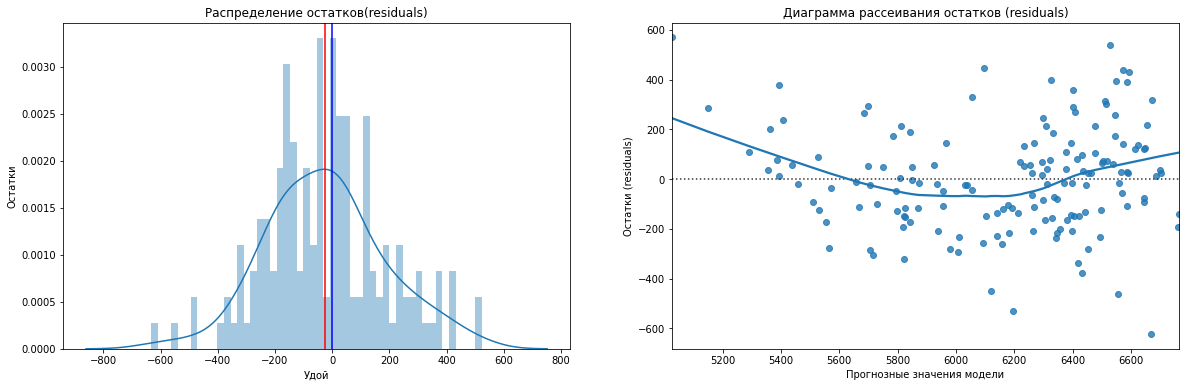

In [41]:
residuals_1 = resid(y_test_1, predictions_1)

**Вывод:**
* Значение R2 модели: 0.7844078173416967
* Распределение остатков отличаерся от нормального, имеет сдвиг влево
* На диаграмме видно, что данные не гомоскедастичны

Модель нудно улушать, нужны дополнительные исследования.

### Вторая модель линейной регрессии

СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО (0.92), которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.

ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

In [42]:
# напишем функцию для бинарной классификации признака СПО с границей 0.92
def spr_bin(num):
    if num <= 0.92:
        return 0
    if num > 0.92:
        return 1

In [43]:
df_ferma['spr_bin'] = df_ferma['spr'].apply(spr_bin) # применяем функцию
df_ferma['efu_squar'] = df_ferma['efu']**2 # вводим признак ЭКЕ в квадрате
df_ferma.head(10) # проверяем

,milk_yield_kg,efu,crude_protein_g,spr,breed,pasture_type,dads_breed,fat_content,protein_content,taste,age,spr_bin,efu_squar
id,,,,,,,,,,,,,
1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84
6,5254,12.7,1806,0.885,рефлешнсоверинг,холмистое,соверин,3.13,3.078,вкусно,менее_2_лет,0,161.29
7,5910,13.2,1792,0.885,вис бик айдиал,равнинное,соверин,3.48,3.077,вкусно,более_2_лет,0,174.24
8,6179,14.7,1806,0.930,вис бик айдиал,равнинное,айдиал,3.55,3.076,вкусно,более_2_лет,1,216.09
9,6783,14.2,1918,0.940,рефлешнсоверинг,холмистое,айдиал,3.71,3.077,вкусно,более_2_лет,1,201.64


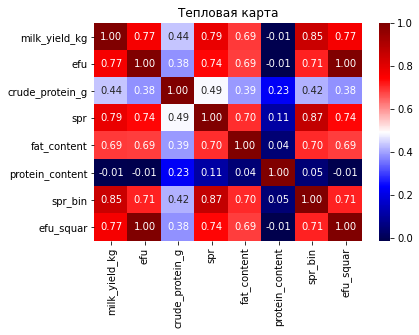

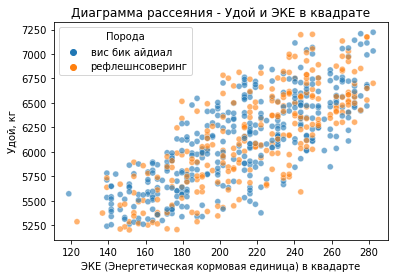

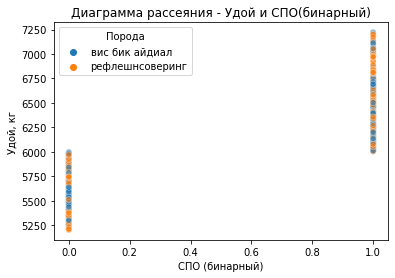

In [44]:
# визуализируем данные с новыми признаками
sns.heatmap(df_ferma.corr(method='spearman'), annot=True, cmap='seismic', fmt='.2f')
plt.title('Тепловая карта')
plt.show()

sns.scatterplot(data=df_ferma, x='efu_squar', y='milk_yield_kg', hue='breed', alpha = 0.6)
plt.title('Диаграмма рассеяния - Удой и ЭКЕ в квадрате')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица) в квадарте')
plt.ylabel('Удой, кг')
plt.legend(title = 'Порода') 
plt.show()

sns.scatterplot(data=df_ferma, x='spr_bin', y='milk_yield_kg', hue='breed', alpha = 0.6)
plt.title('Диаграмма рассеяния - Удой и СПО(бинарный)')
plt.xlabel('СПО (бинарный)')
plt.ylabel('Удой, кг')
plt.legend(title = 'Порода') 
plt.show()

In [45]:
# удаляем категориальные признаки, выбранные количественныепризнаки и целевой признак 
X_2 = df_ferma.drop(['fat_content', 'protein_content', 'taste', 'milk_yield_kg', 'efu', 'spr'], axis=1) 
y_2 = df_ferma['milk_yield_kg'] # выделяем целевой признак

num_col_names_2 = ['efu_squar', 'crude_protein_g'] # выделяем количественные признаки для последующего масштабирования
cat_col_names_2 = ['breed', 'pasture_type', 'dads_breed', 'age', 'spr_bin'] # выделяем качественные признаки для последующего кодирования

In [46]:
model_lr_2, predictions_2, X_train_2, X_test_2, y_test_2, scaler_2, encoder_2, r2_2 = linear_regression(X_2, 
                                                                                                  y_2, 
                                                                                                  num_col_names_2, 
                                                                                                  cat_col_names_2)

Метрика R2 модели линейной регрессии = 0.8180879926867501


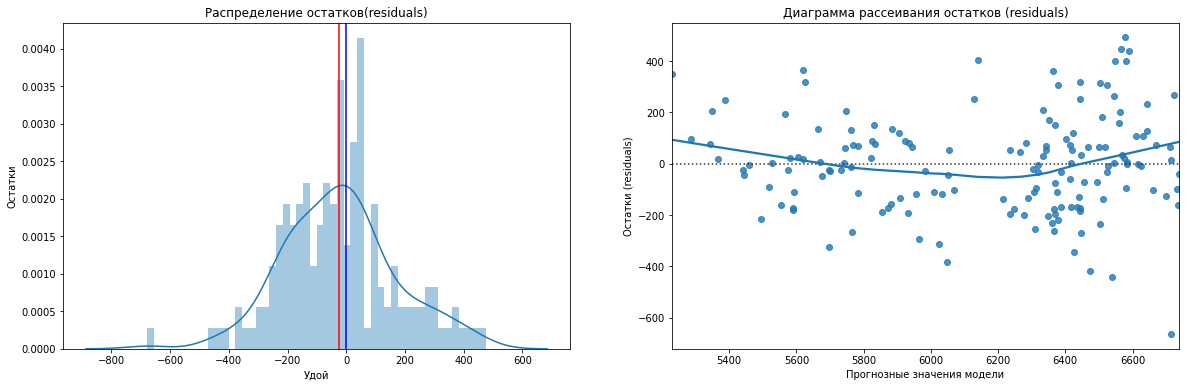

In [47]:
# применяем функция для визуализации
residuals_2 = resid(y_test_2, predictions_2)

**Вывод:**
* Значение R2 модели: 0.81808799268675
* Распределение остатков приблизилось к нормальному, сохраняется сдвиг влево
* На диаграмме рассеивания остается неравномерность распространения дисперсии

Метрика R2 модели улучшилась, однако требуются дополнительные улучшения

### Третья модель линейной регрессии

In [48]:
df_ferma = pd.merge(df_ferma, df_dad, on='id') # добавьте признак Имя Папы, присоединив датасет по ключу
df_ferma.head() # проверяем

,id,milk_yield_kg,efu,crude_protein_g,spr,breed,pasture_type,dads_breed,fat_content,protein_content,taste,age,spr_bin,efu_squar,dads_name
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,буйный
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,соловчик
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,барин
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,буйный
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,барин


In [49]:
# удаляем категориальные признаки, выбранные количественныепризнаки и целевой признак 
X_3 = df_ferma.drop(['fat_content', 'protein_content', 'taste', 'milk_yield_kg', 'efu', 'spr'], axis=1) 
y_3 = df_ferma['milk_yield_kg'] # выделяем целевой признак

num_col_names_3 = ['efu_squar', 'crude_protein_g'] # выделяем количественные признаки для последующего масштабирования
cat_col_names_3 = ['breed', 'pasture_type', 'dads_breed', 'age', 'spr_bin', 'dads_name'] # выделяем качественные признаки для последующего кодирования


In [50]:
model_lr_3, predictions_3, X_train_3, X_test_3, y_test_3, scaler_3, encoder_3, r2_3 = linear_regression(X_3, 
                                                                                                  y_3, 
                                                                                                  num_col_names_3, 
                                                                                                  cat_col_names_3)

Метрика R2 модели линейной регрессии = 0.8247542745210406


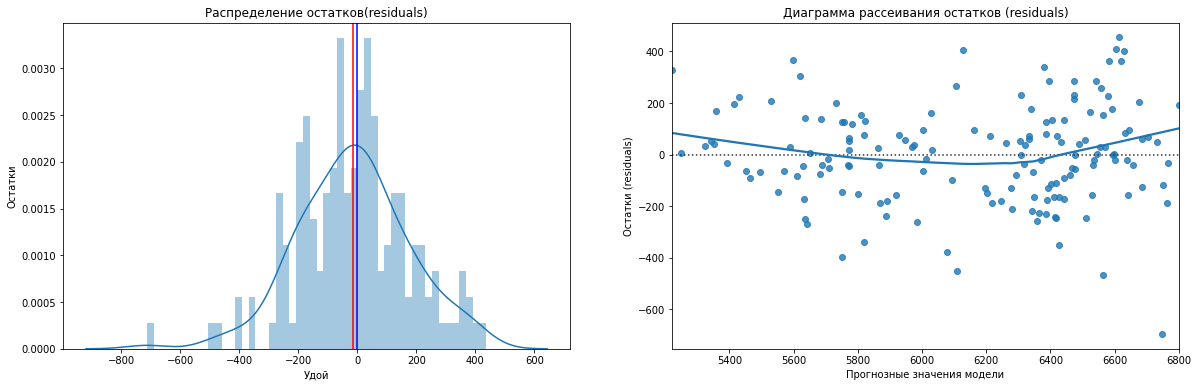

In [51]:
# применяем функция для визуализации
residuals_3 = resid(y_test_3, predictions_3)

**Вывод:**
* Значение R2 модели: 0.8247542745210406
* Распределение остатков наиболее близко к нормальному среди трех моделей, сохраняется сдвиг влево
* На диаграмме рассеивания можно заметить уменьшение неравномерности распространения дисперсии

Модель показала наилучшее значение метрики R2.

### Сравнение моделей

In [52]:
print('R2 первой модели линейной регрессии =', r2_1)
print('R2 второй модели линейной регрессии =', r2_2)
print('R2 третьей модели линейной регрессии =', r2_3)

R2 первой модели линейной регрессии = 0.7844078173416967
R2 второй модели линейной регрессии = 0.8180879926867501
R2 третьей модели линейной регрессии = 0.8247542745210406


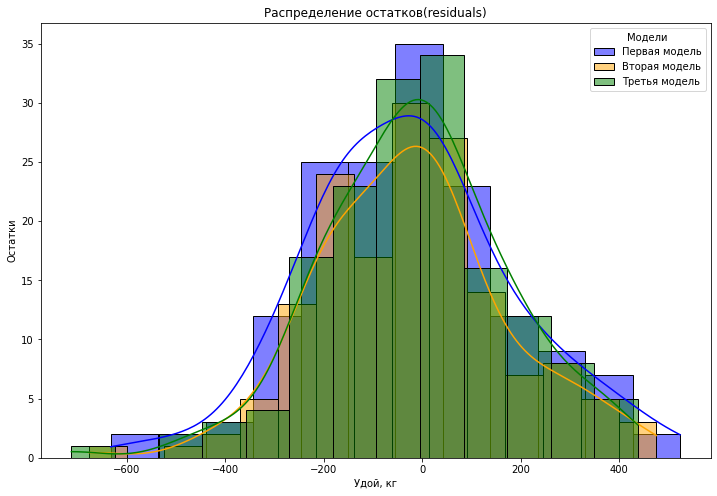

In [53]:
plt.figure(figsize=(12, 8))
sns.histplot(data=residuals_1, color='blue', alpha=0.5, kde=True, label='Первая модель')
sns.histplot(data=residuals_2, color='orange', alpha=0.5, kde=True, label='Вторая модель')
sns.histplot(data=residuals_3, color='green', alpha=0.5, kde=True, label='Третья модель')
plt.title('Распределение остатков(residuals)')
plt.xlabel('Удой, кг')
plt.ylabel('Остатки')
plt.legend(title='Модели')
plt.show()

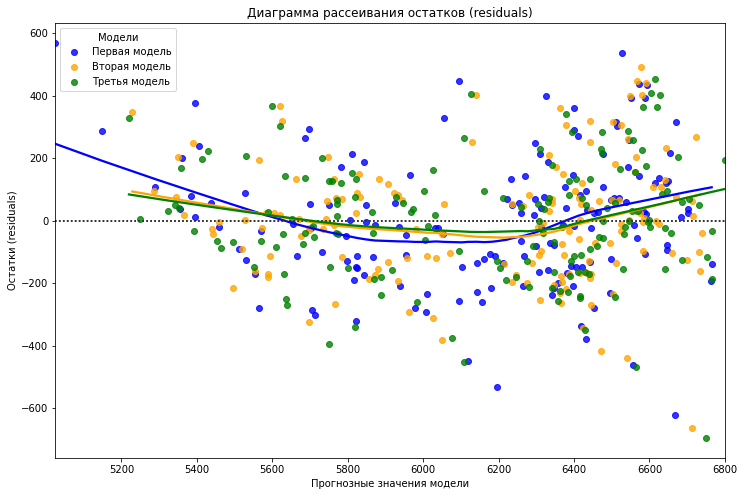

In [54]:
plt.figure(figsize=(12, 8))
sns.residplot(x=predictions_1, y=residuals_1, color='blue', lowess = True, label='Первая модель')
sns.residplot(x=predictions_2, y=residuals_2, color='orange', lowess = True, label='Вторая модель')
sns.residplot(x=predictions_3, y=residuals_3, color='green', lowess = True, label='Третья модель')
plt.title('Диаграмма рассеивания остатков (residuals)')
plt.xlabel('Прогнозные значения модели')
plt.ylabel('Остатки (residuals)')
plt.legend(title='Модели')
plt.show()

In [55]:
def metrics(y, pred):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = mse**(1/2)
    return print(f'MSE = {mse:.2f}, MAE = {mae:.2f}, RMSE = {rmse:.2f}')

In [56]:
print('Метрики первой модели:')
metrics(y_test_1, predictions_1)
print('Метрики второй модели:')
metrics(y_test_2, predictions_2)
print('Метрики третьей модели:')
metrics(y_test_3, predictions_3)

Метрики первой модели:
MSE = 43887.02, MAE = 164.24, RMSE = 209.49
Метрики второй модели:
MSE = 37030.91, MAE = 149.04, RMSE = 192.43
Метрики третьей модели:
MSE = 35673.89, MAE = 146.16, RMSE = 188.88


In [57]:
st.norm.interval(confidence=0.95, loc=np.mean(predictions_3),scale=st.sem(predictions_3))

(6092.340075854289, 6221.375070058381)

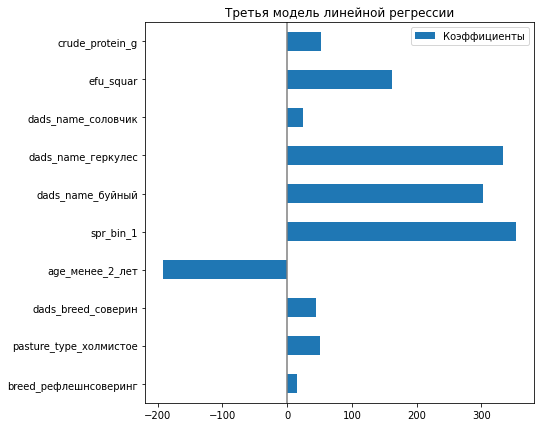

In [58]:
# оценка моделью признаков
coefs = pd.DataFrame(
    model_lr_3.coef_, columns=['Коэффициенты'], index=X_train_3.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Третья модель линейной регрессии')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=0.3)

**Вывод:** третья модель показала наилучший результат по всем метрикам. Доверительный интервал прогноза лучшей модели - (6092.34, 6221.38).

### Прогнозирование удоя

С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить. Данные о них находятся в датасете df_buy.
Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмем из датасета df_ferma средние значения каждого из признаков и увеличим их на 5%.
Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получим прогноз удоя коров.

In [59]:
df_buy.head()

,breed,pasture_type,dads_breed,dads_name,fat_content,protein_content,age
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


In [60]:
df_buy[['efu', 'crude_protein_g', 'spr']] = df_ferma[['efu', 'crude_protein_g', 'spr']].mean() * 1.05
df_buy['efu_squar'] = df_buy['efu']**2 # вводим признак ЭКЕ в квадрате
df_buy['spr_bin'] = df_buy['spr'].apply(spr_bin) # применяем функцию

df_buy.head()  # проверяем

,breed,pasture_type,dads_breed,dads_name,fat_content,protein_content,age,efu,crude_protein_g,spr,efu_squar,spr_bin
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1


In [61]:
# удаляем категориальные признаки, выбранные количественные признаки и целевой признак 
X = df_buy.drop(['fat_content', 'protein_content', 'efu', 'spr'], axis=1) 

num_col_names = ['efu_squar', 'crude_protein_g'] # выделяем количественные признаки для последующего масштабирования
cat_col_names = ['breed', 'pasture_type', 'dads_breed', 'age', 'spr_bin', 'dads_name'] # выделяем качественные признаки для последующего кодирования

X_scaled = scaler_3.transform(X[num_col_names]) # настройка масштабирования масштабирование на тренировочной выборке
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names) # создаем датафреймы из полученных масшатбированных данных

X_ohe = encoder_3.transform(X[cat_col_names]) # обучаем и преобразовываем категориальные признаки из тренировочной выборки 

encoder_col_names = encoder_3.get_feature_names_out() # сохраняем названия новых столбцов 

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names) # создаем датафреймы из полученных закодированных данных

X_new = pd.concat([X_ohe, X_scaled], axis=1) # объединяем датафреймы

predictions = model_lr_3.predict(X_new) # предсказанные значения 

df_buy['predictioins_milk_yield'] = predictions
df_buy

,breed,pasture_type,dads_breed,dads_name,fat_content,protein_content,age,efu,crude_protein_g,spr,efu_squar,spr_bin,predictioins_milk_yield
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6609.919297
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6378.711028
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6283.999775
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6593.089377
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6542.146066
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6425.380218
6,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6571.259737
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6400.540668
8,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6344.707860
9,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6617.928926


In [62]:
mean_yield_ferma = df_ferma['milk_yield_kg'].mean()
print(f'Средний показатель удоя молока в обучающей выборке - {mean_yield_ferma:.2f}')

Средний показатель удоя молока в обучающей выборке - 6125.97


**Вывод:**  получен прогноз удоя для коров на покупку, у всех коров показатель удоя выше среднего показатели по имеющимся коровам.

## Обучение модели логистической регрессии

In [63]:
# приводим целевой признак в бинарный вид
df_ferma['taste_bin'] = df_ferma['taste'].apply(lambda x: 1 if x =='вкусно' else 0)
df_ferma.head() # проверяем

,id,milk_yield_kg,efu,crude_protein_g,spr,breed,pasture_type,dads_breed,fat_content,protein_content,taste,age,spr_bin,efu_squar,dads_name,taste_bin
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,буйный,1
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,соловчик,1
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,барин,0
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,буйный,0
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,барин,1


In [64]:
# удаляем категориальные признаки для оценки удоя и целевлй признак и оставляем признаки для оценки молока
X = df_ferma.drop(['id', 'efu', 'spr', 'crude_protein_g', 'milk_yield_kg', 'taste', 'taste_bin'], axis=1) 
y = df_ferma['taste_bin'] # выделяем целевой признак

RANDOM_STATE = 42 # создание константы RANDOM_STATE

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

num_col_names = ['fat_content', 'protein_content', 'efu_squar', 'spr_bin'] # выделяем количественные признаки для последующего масштабирования
cat_col_names = ['breed', 'pasture_type', 'dads_breed', 'age', 'dads_name'] # выделяем качественные признаки для последующего кодирования

scaler = StandardScaler() # выбор метода масштабирования
encoder = OneHotEncoder(drop='first', sparse_output=False) # выбор метода кодирования

X_train_scaled = scaler.fit_transform(X_train[num_col_names]) # настройка масштабирования масштабирование на тренировочной выборке
X_test_scaled = scaler.transform(X_test[num_col_names]) # масштабирование тестовой выбопки

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names) # создаем датафреймы из полученных масшатбированных данных
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) # обучаем и преобразовываем категориальные признаки из тренировочной выборки 
X_test_ohe = encoder.transform(X_test[cat_col_names]) # преобразовываем тестовую выборку

encoder_col_names = encoder.get_feature_names_out() # сохраняем названия новых столбцов 

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names) # создаем датафреймы из полученных закодированных данных
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_new = pd.concat([X_train_ohe, X_train_scaled], axis=1) # объединяем датафреймы
X_test_new = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression() # инициализация модели

clf = clf.fit(X_train_new, y_train) # обучение модели на тренировочных данных
y_pred = clf.predict(X_test_new) # предсказанные значения 

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy модели логистической регрессии: {accuracy:.3f}')
print(f'Recall модели логистической регрессии: {recall:.3f}')
print(f'Precision модели логистической регрессии: {precision:.3f}')

Accuracy модели логистической регрессии: 0.624
Recall модели логистической регрессии: 0.864
Precision модели логистической регрессии: 0.618


In [65]:
# коэффициенты обученной модели
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 

breed               : +0.054687
pasture_type        : +0.507166
dads_breed          : -0.035902
fat_content         : -0.232645
protein_content     : -0.107136
age                 : -0.108337
spr_bin             : -0.370378
efu_squar           : +0.002109
dads_name           : +0.301176


In [66]:
# 
for feature_number, feature_name in enumerate(X.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.6f}") 

breed               : +1.056210
pasture_type        : +1.660579
dads_breed          : +0.964735
fat_content         : +0.792435
protein_content     : +0.898403
age                 : +0.897325
spr_bin             : +0.690473
efu_squar           : +1.002112
dads_name           : +1.351447


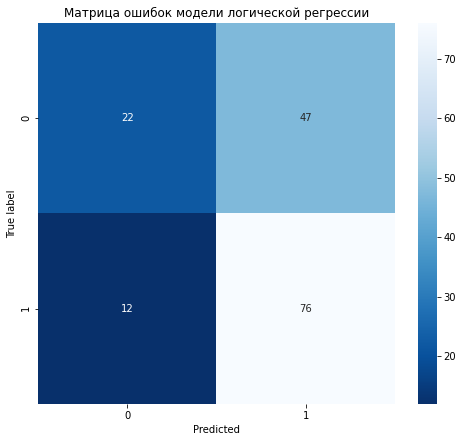

In [67]:
# матрица ошибок
plt.figure(figsize=(8,7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок модели логической регрессии')
plt.ylabel('True label')
plt.xlabel('Predicted');

Accuracy модели логистической регрессии составляет 0.624, Recall - 0.864, Precision - 0.618. 

Для фермера при покупке коров наиболее критичен показатель precision (TP/(TP + FP)), так как главное для заказчика - вкус молока. При снижении ошибок первого рода показатель precision будет расти. Соответственно, в своих дальнейших действиях мы булдем стремиться к минимазации показателя FP.

In [68]:
# выведем объекты по убыванию вероятности их принадлежности к классу 1
y_proba = clf.predict_proba(X_test_new)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head())

     y_valid   y_proba
110        1  0.838158
66         1  0.835183
4          1  0.828851
51         1  0.828796
85         1  0.824584


In [69]:
# добавим пороги
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]
print(thresholds) 

[0.1, 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91]


In [70]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  y_pred_0.1  y_pred_0.19  y_pred_0.28  y_pred_0.37  \
111        0  0.675134           1            1            1            1   
55         0  0.624891           1            1            1            1   
78         0  0.684994           1            1            1            1   
37         0  0.759229           1            1            1            1   
141        0  0.340442           1            1            1            0   

     y_pred_0.46  y_pred_0.55  y_pred_0.64  y_pred_0.73  y_pred_0.82  \
111            1            1            1            0            0   
55             1            1            0            0            0   
78             1            1            1            0            0   
37             1            1            1            1            0   
141            0            0            0            0            0   

     y_pred_0.91  
111            0  
55             0  
78             0  
37             0  
141      

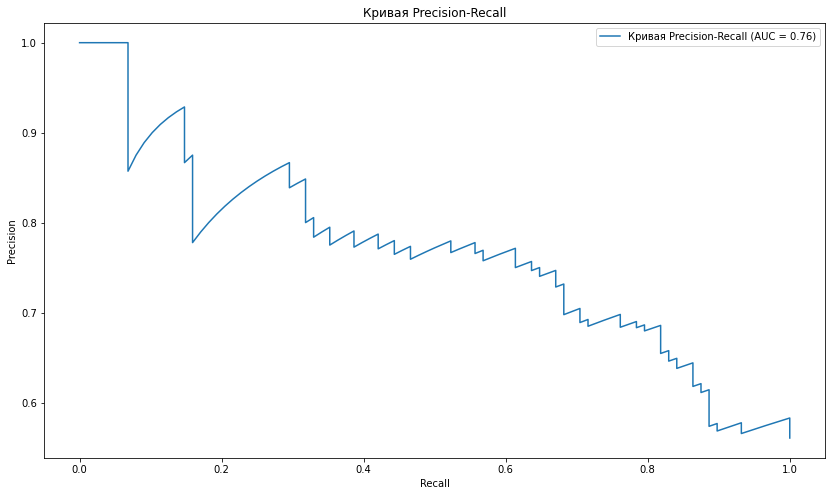

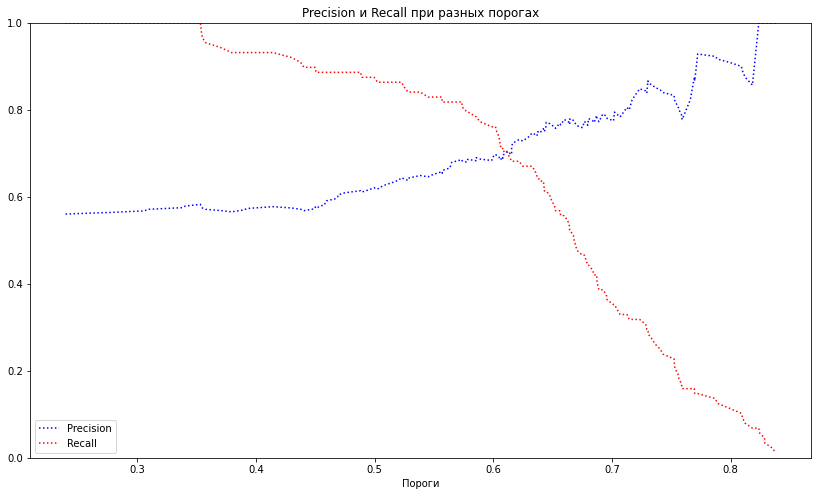

In [71]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
auc_score = auc(recall, precision)

# df_pr = pd.DataFrame()
# df_pr['precision'] = precision[:-1]
# df_pr['recall'] = recall[:-1]
# df_pr['threshold'] = threshold

# pd.options.display.max_rows = None
# display(df_pr)

plt.figure(figsize=(14, 8))
plt.plot(recall, precision, label=f'Кривая Precision-Recall (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(thresholds, precision[:-1], 'b:', label='Precision')
plt.plot(thresholds, recall[:-1], 'r:', label='Recall')
plt.title('Precision и Recall при разных порогах')
plt.xlabel('Пороги')
plt.legend(loc='lower left')
plt.ylim([0,1])
plt.show()

При пороге классификации 0.73 отмечено отсутствие причисления объектов к классу 1. Оцениим данный порог с помощью матрицы ошибок и метрик.

Accuracy модели логистической регрессии с порогом : 0.541
Recall модели логистической регрессии: 0.261
Precision модели логистической регрессии: 0.767


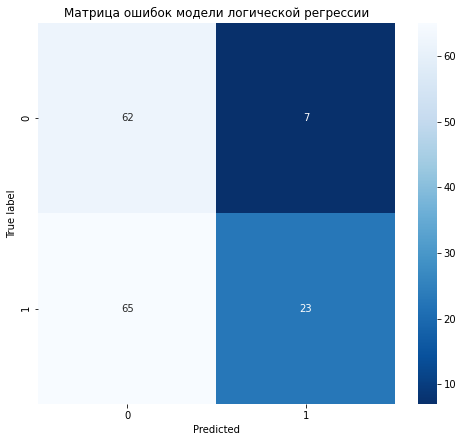

In [72]:
accuracy = accuracy_score(y_test, data['y_pred_0.73'])
recall = recall_score(y_test, data['y_pred_0.73'])
precision = precision_score(y_test, data['y_pred_0.73'])

print(f'Accuracy модели логистической регрессии с порогом : {accuracy:.3f}')
print(f'Recall модели логистической регрессии: {recall:.3f}')
print(f'Precision модели логистической регрессии: {precision:.3f}')

plt.figure(figsize=(8,7))
cm = confusion_matrix(y_test, data['y_pred_0.73'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок модели логической регрессии')
plt.ylabel('True label')
plt.xlabel('Predicted');

При установленном пороге классификации 0.73 значения метрик повысились, precision составляет 0.767 (против 0.618 исходной модели)

Accuracy модели логистической регрессии с порогом : 0.452
Recall модели логистической регрессии: 0.045
Precision модели логистической регрессии: 0.667


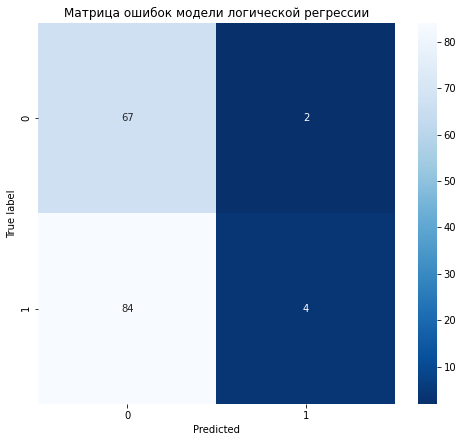

In [73]:
plt.figure(figsize=(8,7))
cm = confusion_matrix(y_test, data['y_pred_0.82'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок модели логической регрессии')
plt.ylabel('True label')
plt.xlabel('Predicted');

accuracy = accuracy_score(y_test, data['y_pred_0.82'])
recall = recall_score(y_test, data['y_pred_0.82'])
precision = precision_score(y_test, data['y_pred_0.82'])

print(f'Accuracy модели логистической регрессии с порогом : {accuracy:.3f}')
print(f'Recall модели логистической регрессии: {recall:.3f}')
print(f'Precision модели логистической регрессии: {precision:.3f}')

При повышении порога значения метрик снижаются. Выберем 0.73 как порог классификации для дальнейшего предсказания вкуса молока.

### Прогнозирование вкуса молока

In [74]:
df_buy.head()

,breed,pasture_type,dads_breed,dads_name,fat_content,protein_content,age,efu,crude_protein_g,spr,efu_squar,spr_bin,predictioins_milk_yield
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6609.919297
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6378.711028
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6283.999775
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6593.089377
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6542.146066


In [75]:
# удаляем лишние признаки
X = df_buy.drop(['efu', 'spr', 'crude_protein_g', 'predictioins_milk_yield'], axis=1) 

num_col_names = ['fat_content', 'protein_content', 'efu_squar', 'spr_bin'] # выделяем количественные признаки для последующего масштабирования
cat_col_names = ['breed', 'pasture_type', 'dads_breed', 'age', 'dads_name'] # выделяем качественные признаки для последующего кодирования

X_scaled = scaler.transform(X[num_col_names]) # масштабирование на тренировочной выборке

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names) # создаем датафреймы из полученных масшатбированных данных

X_ohe = encoder.transform(X[cat_col_names]) # преобразовываем категориальные признаки из тренировочной выборки 

encoder_col_names = encoder.get_feature_names_out() # сохраняем названия новых столбцов 

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names) # создаем датафрейм из полученных закодированных данных

X_new = pd.concat([X_ohe, X_scaled], axis=1) # объединяем датафреймы

In [76]:
y_pred_threshold = (clf.predict_proba(X_new)[:, 1] >= 0.73).astype(int)
y_pred_threshold

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

При заданном пороге все значения равны 0. Снизим порог.

In [77]:
y_pred_threshold = (clf.predict_proba(X_new)[:, 1] >= 0.7).astype(int)
y_pred_threshold

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [78]:
df_buy['taste_pred'] = y_pred_threshold
df_buy['taste_pred'] = df_buy['taste_pred'].apply(lambda x: 'вкусно' if x==1 else 'не вкусно')
df_buy

,breed,pasture_type,dads_breed,dads_name,fat_content,protein_content,age,efu,crude_protein_g,spr,efu_squar,spr_bin,predictioins_milk_yield,taste_pred
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6609.919297,не вкусно
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6378.711028,не вкусно
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6283.999775,не вкусно
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6593.089377,не вкусно
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6542.146066,не вкусно
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6425.380218,не вкусно
6,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6571.259737,не вкусно
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6400.540668,вкусно
8,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6344.707860,не вкусно
9,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6617.928926,не вкусно


**Вывод:** При применении модели логистической регрессии с порогом классификации 0.7 определено, что только 2 коровы из планируемых на покупку имеет вкусное молоко.

## Итоговые выводы

Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [79]:
df_cows = df_buy.query('predictioins_milk_yield > 6000 and taste_pred == "вкусно"')
df_cows

,breed,pasture_type,dads_breed,dads_name,fat_content,protein_content,age,efu,crude_protein_g,spr,efu_squar,spr_bin,predictioins_milk_yield,taste_pred
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6400.540668,вкусно
13,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6344.707860,вкусно


Был произведен отбор двух коров из представленной выборки.

* Именно их фермер может купить из стада на продажу с минимальным риском для себя, так как на основе моделей линейной и логистической регресии были установлены необходимые признаки, а именно удой больше 6000 кг и достоверно вкусное молоко.
* Из рекмоендаций фермеру можно отметить, что для получения большего удоя стоит увеличивать признаки 'ЭКЕ (Энергетическая кормовая единица)' и 'СПО (Сахаро-протеиновое соотношение)', так как между ними и удоем отмечена сильная корреляция. 
* На вкус молока наибольшее вkияние оказали 'Тип пастбища', 'Имя_папы' и 'СПО (Сахаро-протеиновое соотношение) в корме', в меньшей степени возраст.

### Выводы о моделях линейной регрессии и логистической регрессии.

**Загрузка данных:** в датасете `ferma_main` - 634 значения, пропуски отсутсвуют, количество явных дубликатов - 5. В датасете `ferma_dad` - 629 значений, пропуски отсутсвуют, явные дубликаты отсутсвуют. В датасете `cow_buy` - 20 значений, пропуски отсутсвуют, количество явных дубликатов - 4.

**Предобработка данных:** в ходе предобработки данных в датасетах строковые значения были приведены в нижний регистр, удалены дубликаты.

**Исследовательский анализ данных:** 
* В признаке 'milk_yield_kg' аномальное значение, которые было удалено из датасета.
* У всех количественных признаков распределение не является нормальным, за исключением признака содержания белка в молоке. 
* В признаке 'fat_content' имеется 86 выброса, которые составляют 13,6% датафрейма. В связи с чем принято решение их оставить.
* Коров породы 'вис бик айдиал' больше чем коров породы 'рефлешнсоверинг' (372 и 256, соответсвенно).
* Тип пастбища 'холмистое' наблюдается чаще чем тип пастбища 'равнинное' (350 и 278, соответственно.)
* Порода папы-быка 'айдиал' наблюдается несколько чаще чем порода "соверин" (317 и 311, соответсвенно).
* Вкусное молоко наблюдается чаще чем невкусное (370 и 258, соответсвенно).
* Коров старше 2 лет больше чем более молодых коров (519 и 110, соответсвенно).
* Распределение коров в зависимости от папы-быка: Барин - 240 коров, Буйный - 215, Соловчик - 110, Геркулес - 64.

Проведен исследовательский анализ данных. В ходе анализа установлено, что количественные признаки необходимо масштабировать для дальнейшей работы. Категориальные признаки в дальнейшем будут бинарно закодированы.

**Корреляционный анализ данных:** между признаками наблюдается нелинейная связь. Мультиколлинеарность между признаками отсутствует.

**Модели линейной регресиии:** в ходе работы были обучены три модели линейной реграсии.
Метрики первой модели: `MSE` = 43887.02, `MAE` = 164.24, `RMSE` = 209.49
Метрики второй модели: `MSE` = 37030.91, `MAE` = 149.04, `RMSE` = 192.43
Метрики третьей модели: `MSE` = 35673.89, `MAE` = 146.16, `RMSE` = 188.88

Для улучшения показателей прогноза первой модели в обучении второй модели была произведена коррективовка входных признаков. Для орбучения третьей модели был добавлен 1 входной признак ('Имя_отца'), что в привело к улучшению метрик.

Повышение качества модели возможно за счет добавления новых признаков или обработки уже имеющихся числовых признаков.

**Модель логистической регрессии:** была обучена модель логистической регрессии и определен оптимальный порог классификации. При применении модели логистической регрессии с порогом классификации 0.7 установлено, что только 2 коровы из планируемых на покупку имеет вкусное молоко.

Для оценки работы модели использовались такие метрики как `accuracy`, `precision` и `recall`. Для решения данной задачи метрика `precision` была наиболее важна, так нужно было сократить количество ошибок первого рода (т.е. когда невкусное молоко определялось как вкусное (FP)). Именно на увеличение данной метрики и было направлено изменение порога классификации. И `precision`, и `recall` важны при анализе рисков или экономических расчётов, но выбор приоритетной метрик долден зависеть от исходной задачи заказчика.